In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv("FFUT_FDT.csv")
cleaned_data = original_data.copy()
cleaned_data = cleaned_data[cleaned_data['Agmtcd'].str.startswith('IH')]
cleaned_data = cleaned_data.loc[cleaned_data.groupby('Trddt')['Volume'].idxmax()]
cleaned_data

Trddt  Agmtcd             Trdvar_en  Exhcd       Deldt  Opnprc  \
4848   2015-04-16  IH1505  SSE 50 Index Futures  CFFEX  2015-05-15  3100.0   
4864   2015-04-17  IH1505  SSE 50 Index Futures  CFFEX  2015-05-15  3303.6   
4871   2015-04-20  IH1505  SSE 50 Index Futures  CFFEX  2015-05-15  3258.0   
4883   2015-04-21  IH1505  SSE 50 Index Futures  CFFEX  2015-05-15  3176.8   
4895   2015-04-22  IH1505  SSE 50 Index Futures  CFFEX  2015-05-15  3250.0   
...           ...     ...                   ...    ...         ...     ...   
37445  2025-06-30  IH2509  SSE 50 Index Futures  CFFEX  2025-09-19  2683.2   
37461  2025-07-01  IH2509  SSE 50 Index Futures  CFFEX  2025-09-19  2691.0   
37477  2025-07-02  IH2509  SSE 50 Index Futures  CFFEX  2025-09-19  2692.0   
37493  2025-07-03  IH2509  SSE 50 Index Futures  CFFEX  2025-09-19  2700.0   
37509  2025-07-04  IH2509  SSE 50 Index Futures  CFFEX  2025-09-19  2699.8   

        Hiprc   Loprc  Clsprc   Stprc  Ystprc  Updown1  Updown2  Volume  \
4848   3288.2  3088.8  3283.8  3223.6  3058.8    225.0    164.8  144423   
4864   3341.6  3238.0  3254.0  3280.8  3223.6     30.4     57.2  271224   
4871   3315.0  3143.6  3146.8  3176.8  3280.8   -134.0   -104.0  267213   
4883   3242.2  3153.0  3234.0  3211.2  3176.8     57.2     34.4  239311   
4895   3333.2  3229.8  3308.0  3309.6  3211.2     96.8     98.4  239676   
...       ...     ...     ...     ...     ...      ...      ...     ...   
37445  2690.8  2670.2  2689.0  2687.6  2681.8      7.2      5.8   22994   
37461  2696.6  2680.6  2689.8  2692.6  2687.6      2.2      5.0   17755   
37477  2701.2  2683.0  2696.8  2696.8  2692.6      4.2      4.2   20389   
37493  2704.4  2688.0  2701.8  2700.4  2696.8      5.0      3.6   19650   
37509  2741.6  2690.0  2717.2  2711.2  2700.4     16.8     10.8   39517   

       Opint  Yopint  Chopint      Turnover  
4848   28848       0    28848  1.377287e+07  
4864   37853   28848     9005  2.675521e+07  
4871   37975   37853      122  2.605294e+07  
4883   37771   37975     -204  2.293201e+07  
4895   42623   37771     4852  2.354757e+07  
...      ...     ...      ...           ...  
37445  49133   53070    -3937  1.850947e+06  
37461  48099   49133    -1034  1.432359e+06  
37477  47699   48099     -400  1.647659e+06  
37493  46778   47699     -921  1.590251e+06  
37509  56007   46778     9229  3.218803e+06  

[2485 rows x 18 columns]

In [3]:
#计算 IH_daily_rr
cleaned_data['IH_daily_rr'] = (cleaned_data['Stprc'] - cleaned_data['Ystprc']) / cleaned_data['Ystprc']
daily_std = cleaned_data['IH_daily_rr'].std()
Ann_std = daily_std * np.sqrt(245)
σ = Ann_std
σ

0.21400619148032346

In [4]:
τ = np.arange(0,1,0.01)
τ

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [5]:
df_value = []
Multiplier = 300

for i in τ:
    Capital =10000000
    N = (Capital * i ) / (Multiplier * cleaned_data['Stprc']* σ) 
    N = round(N,0)
    cleaned_data['N'] = N
    cleaned_data['N'] = cleaned_data['N'].shift(1) #基于前一天算出的 N 作为今天买入的合约数量
    cleaned_data['returns'] = (cleaned_data['Stprc']- cleaned_data['Ystprc']) * cleaned_data['N'] * Multiplier
    cleaned_data.iat[0,-1] = 0
    cleaned_data['capital_t'] = cleaned_data['returns'].cumsum() + 10000000
    cleaned_data.iat[0,-1] = 10000000
    cleaned_data['capital_t'] = cleaned_data['capital_t'].shift(1)
    cleaned_data['p_ret'] = cleaned_data['returns']/cleaned_data['capital_t']
    final_value = cleaned_data.iloc[-1,-1]
    df_value.append(final_value)

df_value = pd.DataFrame(df_value)
df_value['Target'] = τ
df_value.columns = ['final_value', 'Target']
df_value

final_value  Target
0      0.000000    0.00
1      0.000313    0.01
2      0.000315    0.02
3      0.000615    0.03
4      0.000600    0.04
..          ...     ...
95     0.006017    0.95
96     0.005970    0.96
97     0.006074    0.97
98     0.006114    0.98
99     0.006081    0.99

[100 rows x 2 columns]

/var/folders/02/tp9zyfnd75v0cdl4kt6z44dc0000gn/T/ipykernel_10020/440893247.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


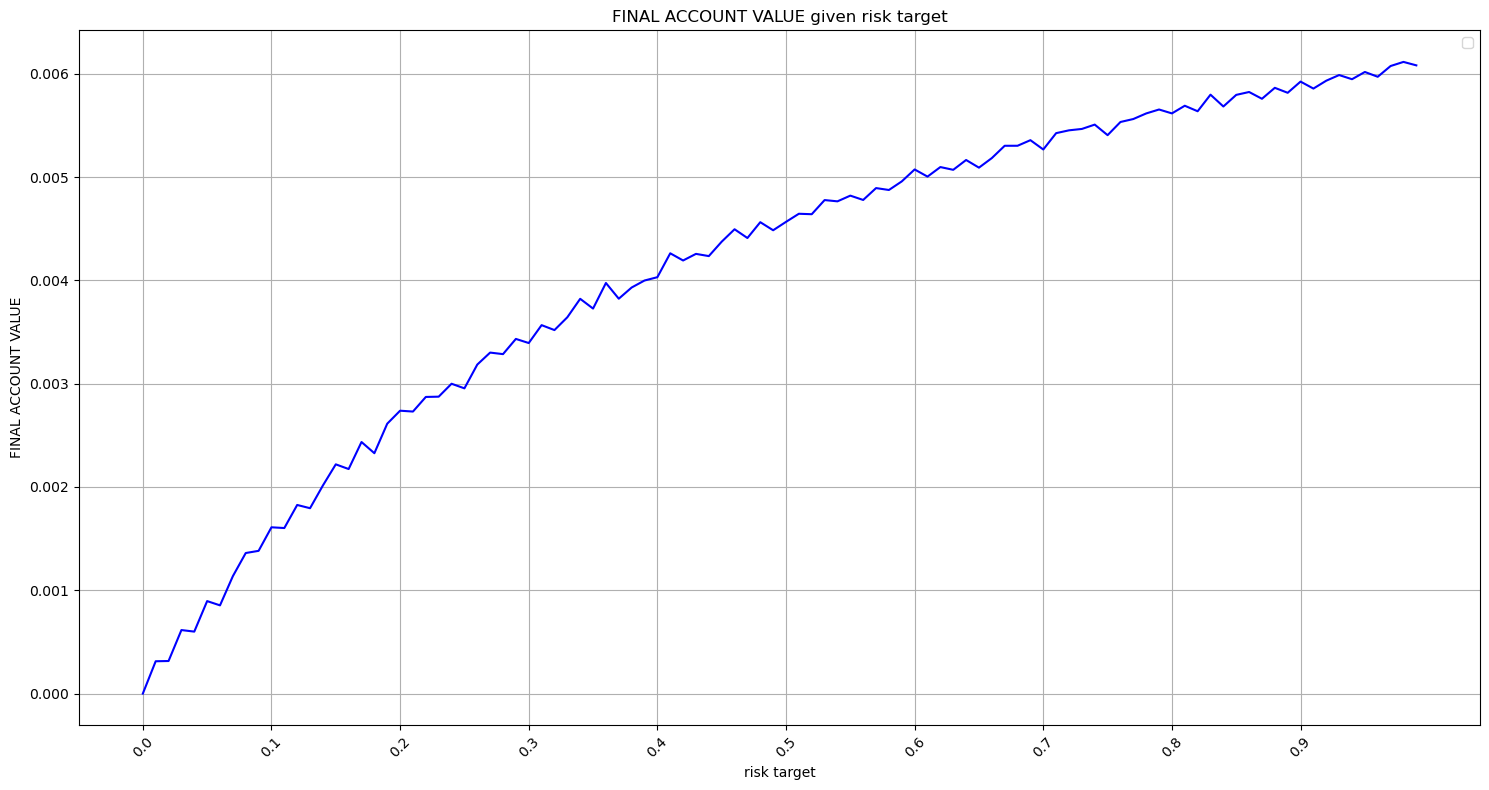

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(df_value['Target'] , df_value['final_value'] ,'b-')
plt.title("FINAL ACCOUNT VALUE given risk target")
plt.ylabel("FINAL ACCOUNT VALUE")
plt.xlabel("risk target")
plt.xticks(df_value['Target'][::10], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()